In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import pickle


In [2]:
stop_potision_stretch = 330

data_dir = "./com_arrays_all.pickle"


In [3]:
with open(data_dir, mode="rb") as f:
    com_arrays_normal_probe = pickle.load(f)  


In [4]:
bin_centers = np.load('./bins.npy')

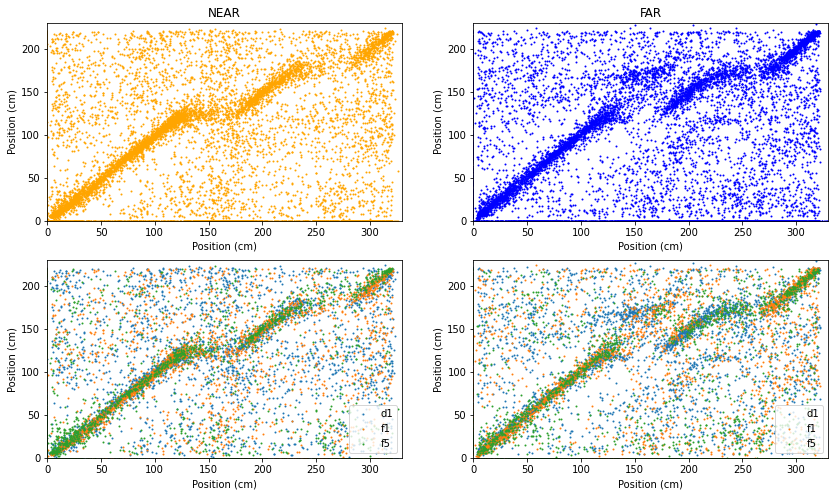

In [5]:
trial_type = ['NEAR','FAR']
colors = ['orange','blue']

fig, ax = plt.subplots(2,2, figsize=(14,8))
for rid in range(2):
    ax[0,rid].scatter(com_arrays_normal_probe[0][rid][:,2],com_arrays_normal_probe[0][rid][:,1],s=1,color= colors[rid])
    ax[0,rid].scatter(com_arrays_normal_probe[1][rid][:,2],com_arrays_normal_probe[1][rid][:,1],s=1,color=colors[rid])
    ax[0,rid].scatter(com_arrays_normal_probe[2][rid][:,2],com_arrays_normal_probe[2][rid][:,1],s=1,color=colors[rid])
    ax[0,rid].set_xlim(0,stop_potision_stretch)
    ax[0,rid].set_ylim(0,230)
    ax[0,rid].set_title(trial_type[rid])
    ax[0,rid].set_xlabel('Position (cm)')
    ax[0,rid].set_ylabel('Position (cm)')

    ax[1,rid].scatter(com_arrays_normal_probe[0][rid][:,2],com_arrays_normal_probe[0][rid][:,1],s=1,label='d1')
    ax[1,rid].scatter(com_arrays_normal_probe[1][rid][:,2],com_arrays_normal_probe[1][rid][:,1],s=1,label='f1')
    ax[1,rid].scatter(com_arrays_normal_probe[2][rid][:,2],com_arrays_normal_probe[2][rid][:,1],s=1,label='f5')
    ax[1,rid].set_xlim(0,stop_potision_stretch)
    ax[1,rid].set_ylim(0,230)
    ax[1,rid].set_xlabel('Position (cm)')
    ax[1,rid].set_ylabel('Position (cm)')
    ax[1,rid].legend(loc='lower right')

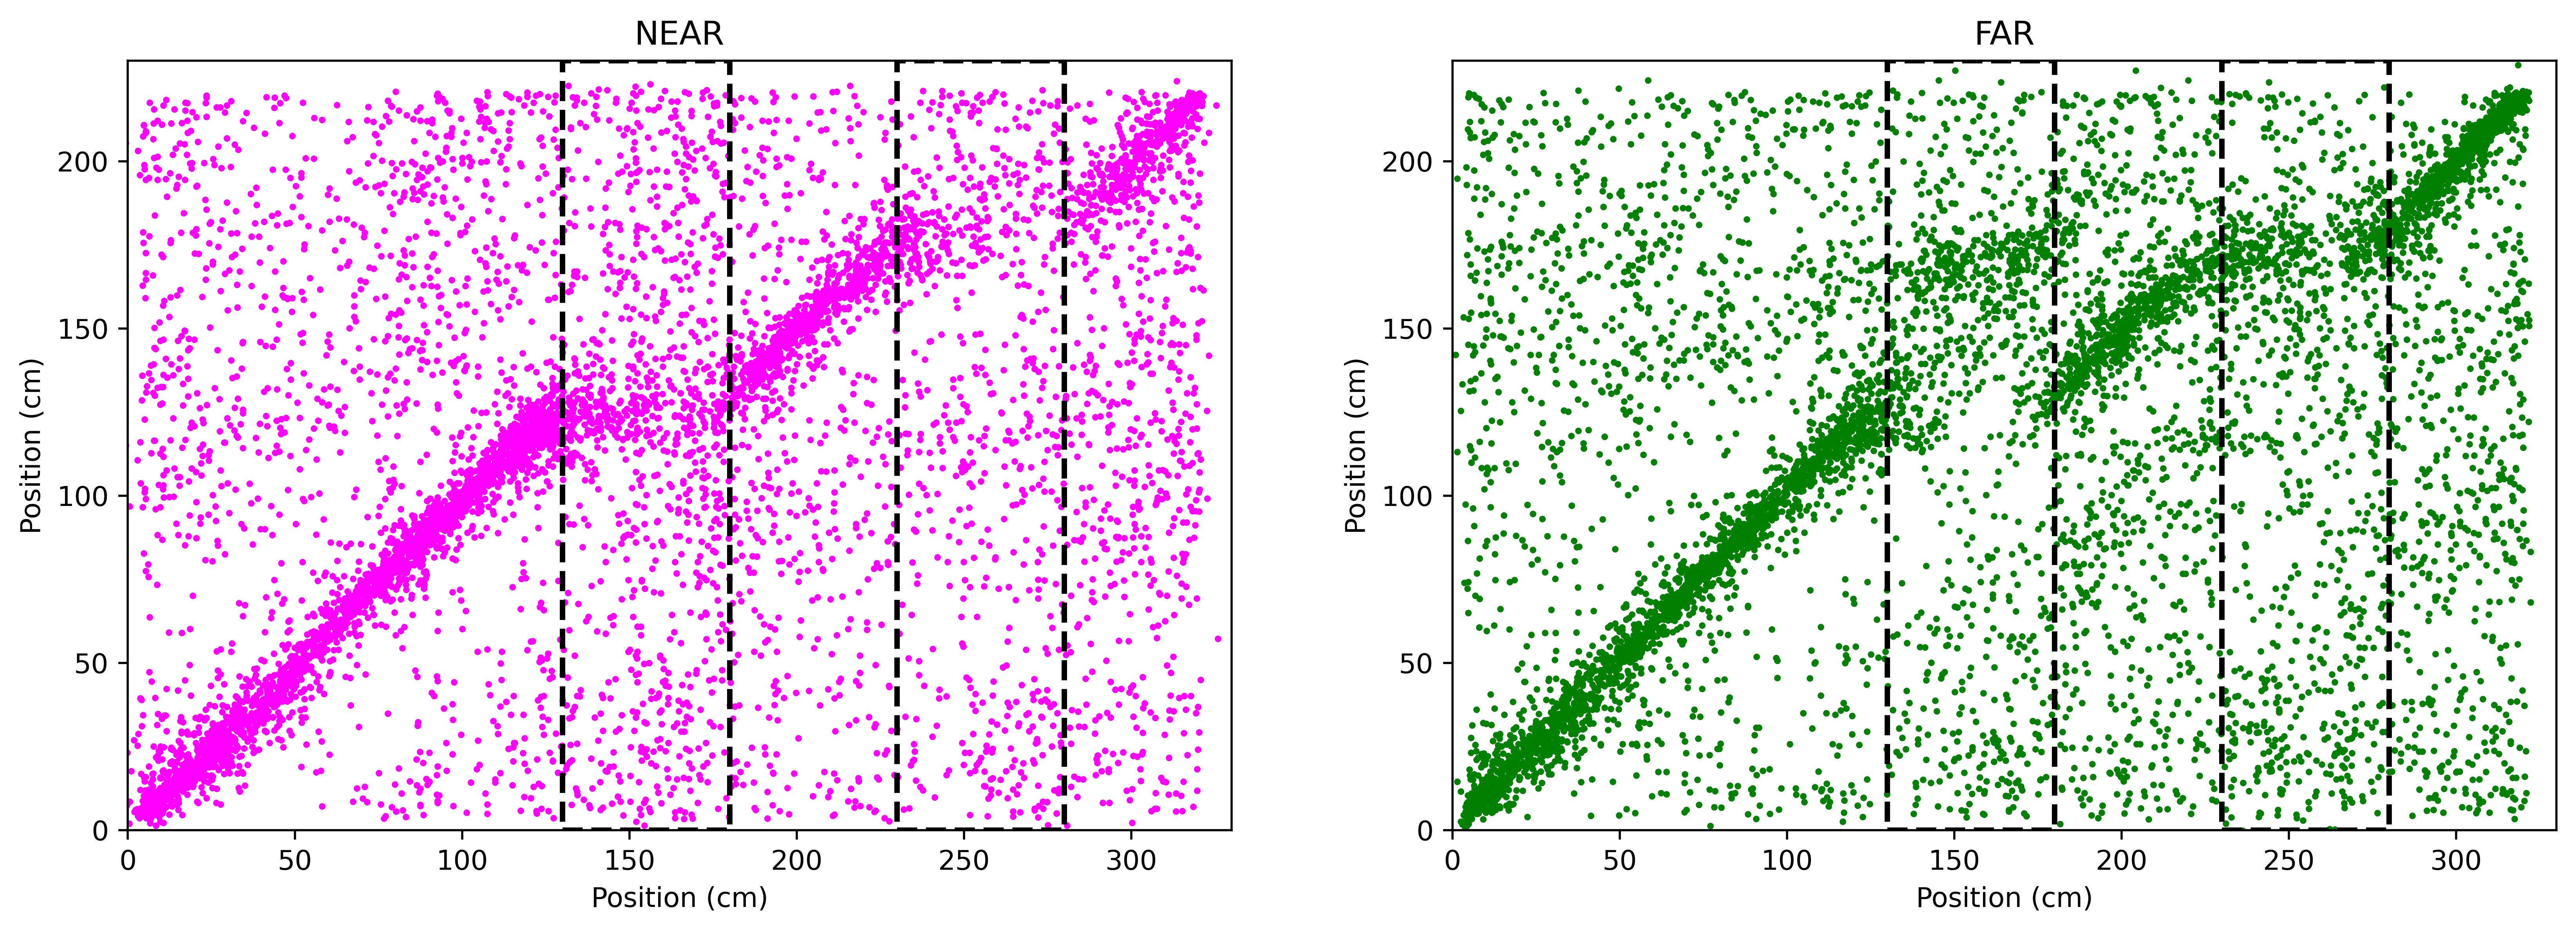

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

trial_type = ['NEAR', 'FAR']
colors = ['magenta', 'green']

aspect_ratio = 330 / 230

# Figure width can be defined freely
fig_width = 8

# Figure height is determined by the width and aspect ratio
fig_height = fig_width / aspect_ratio

# Now we use these dimensions to create a figure
fig, ax = plt.subplots(1, 2, figsize=(fig_width * 2, fig_height),dpi = 500)  # Multiplying width by 2 because there are two subplots

for rid in range(2):
    ax[rid].scatter(com_arrays_normal_probe[0][rid][:,2], com_arrays_normal_probe[0][rid][:,1], s=2, color=colors[rid], rasterized=True)
    ax[rid].scatter(com_arrays_normal_probe[1][rid][:,2], com_arrays_normal_probe[1][rid][:,1], s=2, color=colors[rid], rasterized=True)
    ax[rid].scatter(com_arrays_normal_probe[2][rid][:,2], com_arrays_normal_probe[2][rid][:,1], s=2, color=colors[rid], rasterized=True)
    ax[rid].set_xlim(0, 330)
    ax[rid].set_ylim(0, 230)
    ax[rid].set_title(trial_type[rid])
    ax[rid].set_xlabel('Position (cm)')
    ax[rid].set_ylabel('Position (cm)')
    ax[rid].set_aspect('equal')

    # Add rectangles
    rect1 = Rectangle((130, 0), 50, 230, linewidth=2, edgecolor='black', facecolor='none', linestyle='--')  # linewidth increased to 2
    rect2 = Rectangle((230, 0), 50, 230, linewidth=2, edgecolor='black', facecolor='none', linestyle='--')  # linewidth increased to 2
    ax[rid].add_patch(rect1)
    ax[rid].add_patch(rect2)

plt.savefig('stretched_trials.pdf', format='pdf', dpi=500)  # Save the figure as a pdf
plt.show()


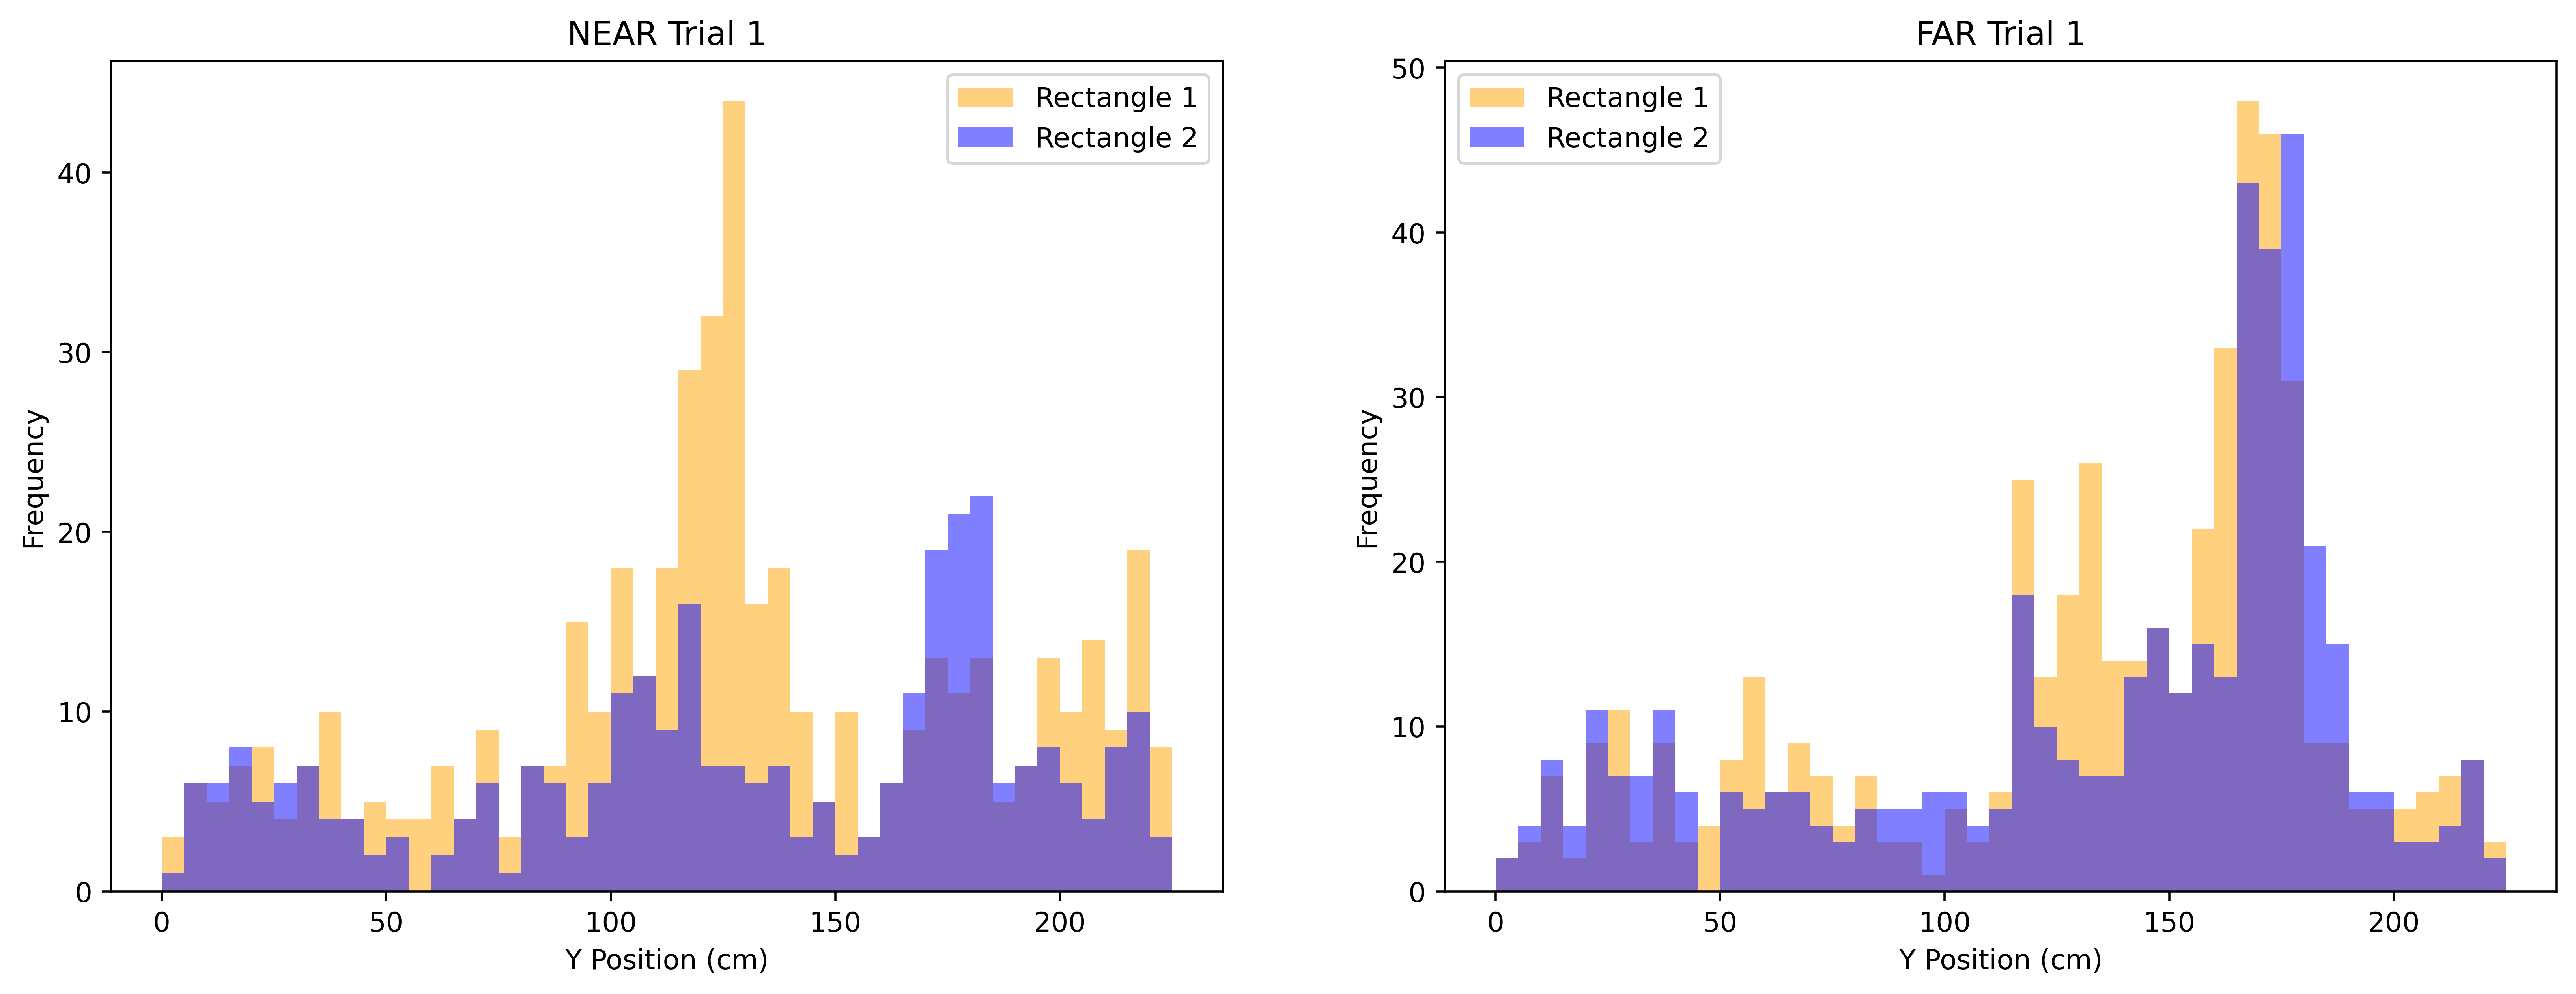

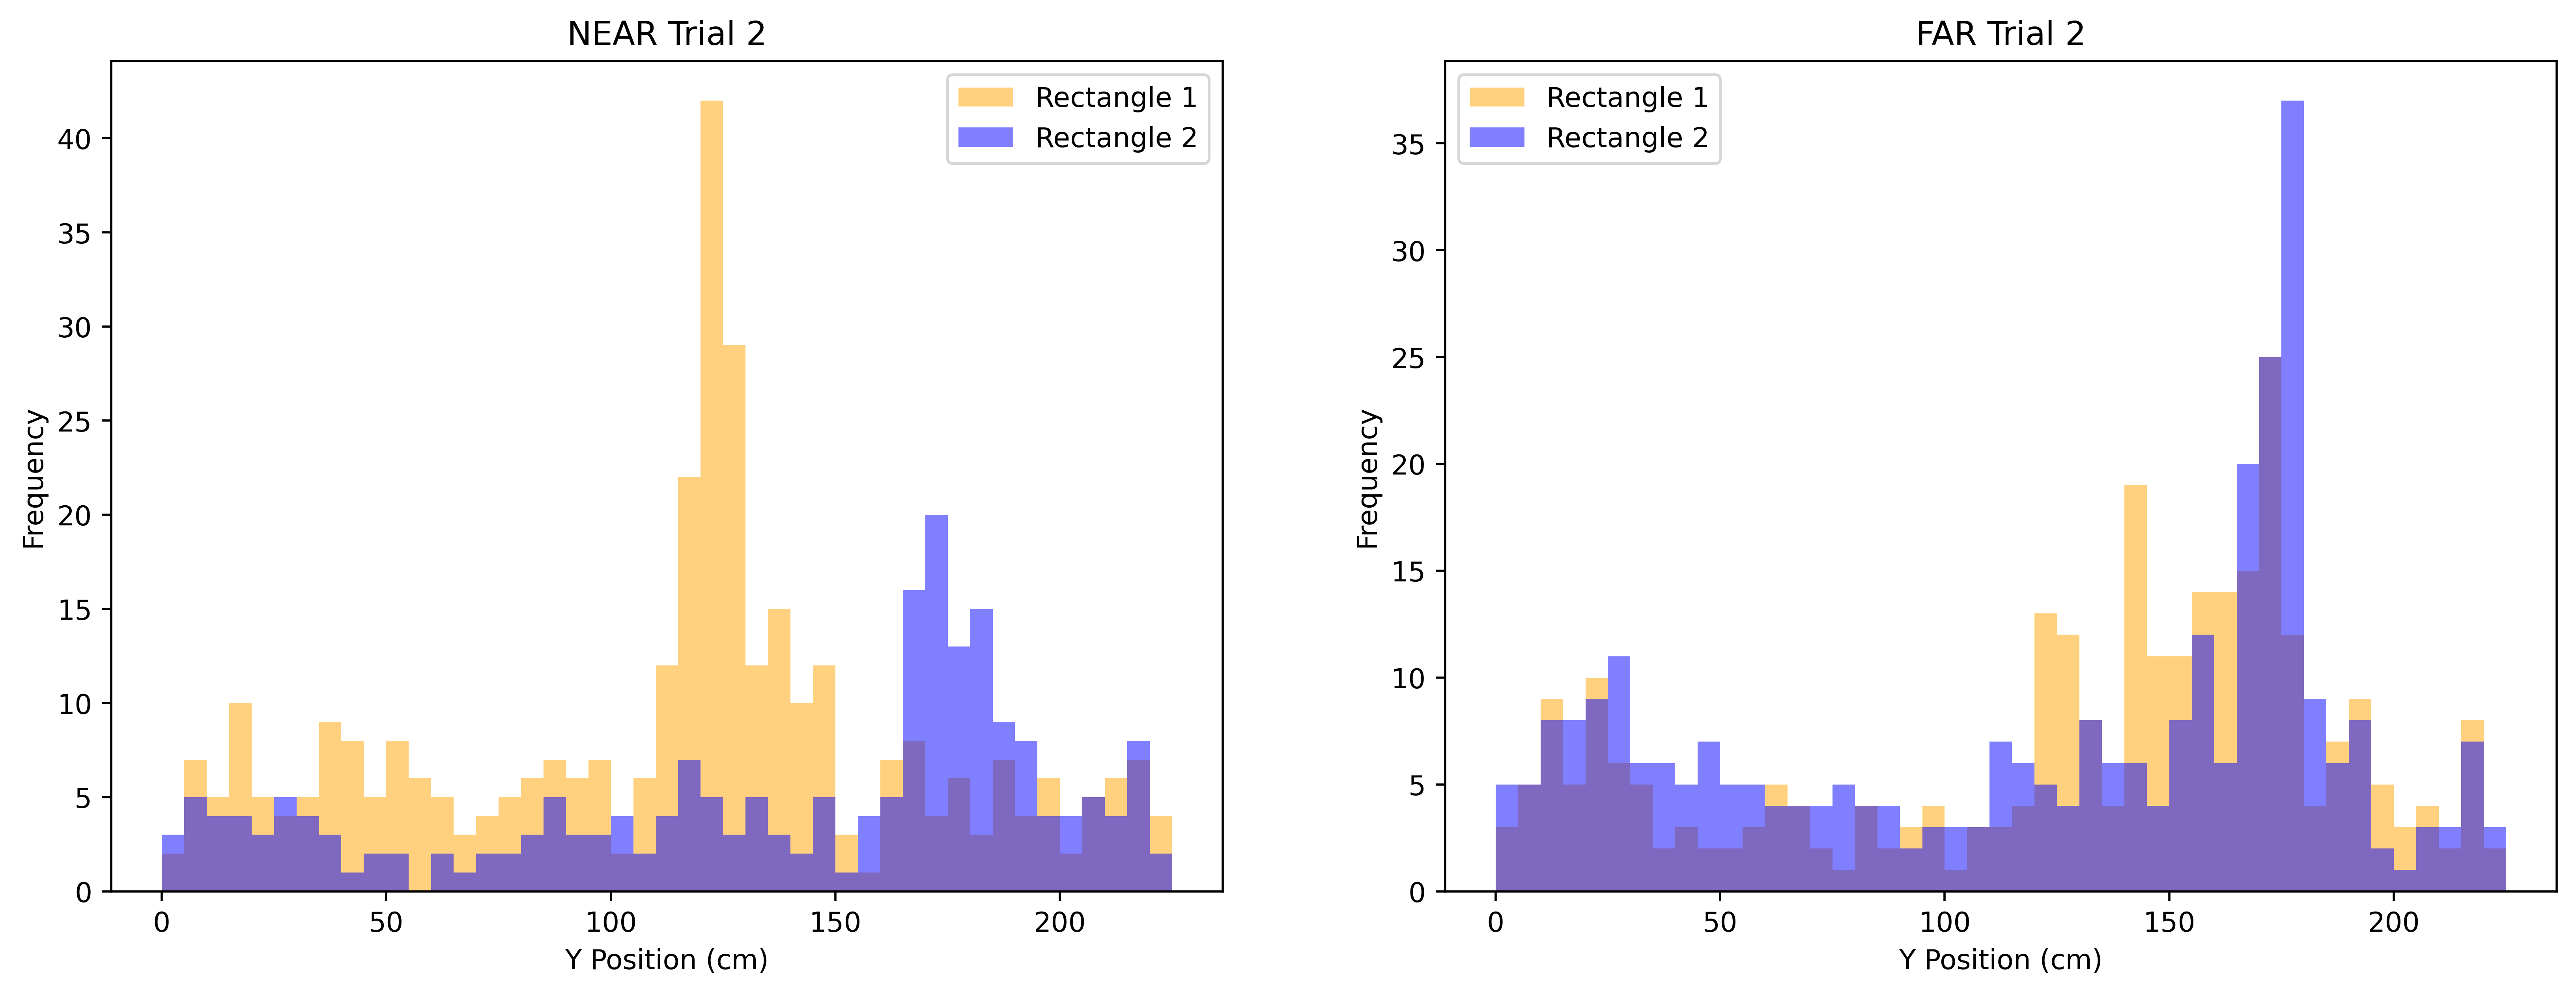

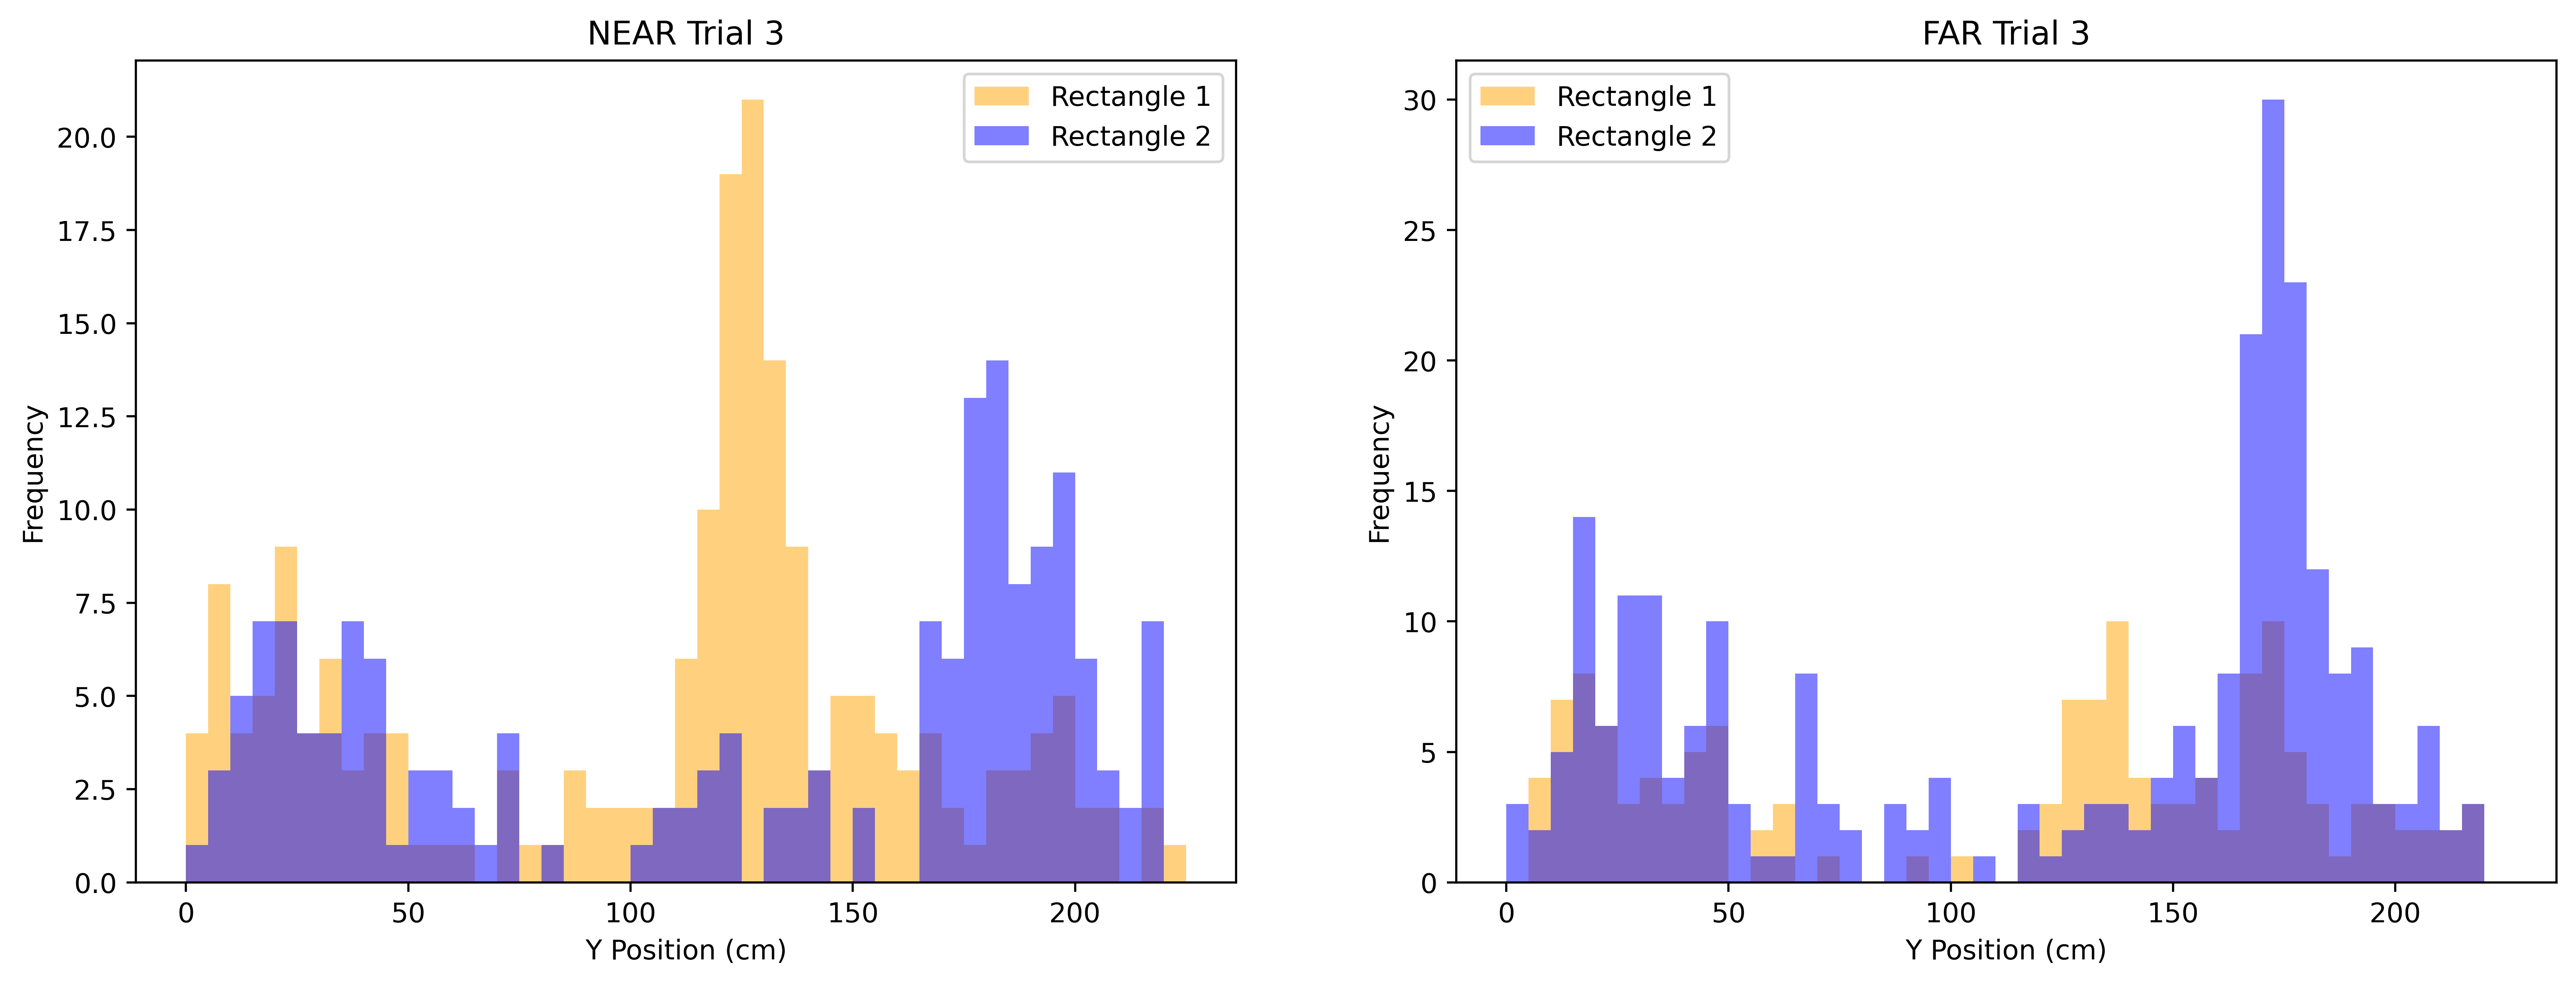

In [8]:
for i in range(3):  # to go over com_arrays_normal_probe[0] through [2]
    fig, ax = plt.subplots(1, 2, figsize=(fig_width * 2, fig_height), dpi = 500)

    for rid in range(2):
        # filter data that are inside the rectangles
        rect1_data = com_arrays_normal_probe[i][rid][(com_arrays_normal_probe[i][rid][:,2] >= 130) & 
                                                      (com_arrays_normal_probe[i][rid][:,2] <= 180) &
                                                      (com_arrays_normal_probe[i][rid][:,1] >= 0) &
                                                      (com_arrays_normal_probe[i][rid][:,1] <= 230)]
        
        rect2_data = com_arrays_normal_probe[i][rid][(com_arrays_normal_probe[i][rid][:,2] >= 230) & 
                                                      (com_arrays_normal_probe[i][rid][:,2] <= 280) &
                                                      (com_arrays_normal_probe[i][rid][:,1] >= 0) &
                                                      (com_arrays_normal_probe[i][rid][:,1] <= 230)]

        # plot histograms of y coordinates
        ax[rid].hist(rect1_data[:,1], bins=range(0, 230, 5), alpha=0.5, color='orange', label='Rectangle 1')
        ax[rid].hist(rect2_data[:,1], bins=range(0, 230, 5), alpha=0.5, color='blue', label='Rectangle 2')
        ax[rid].set_title(f'{trial_type[rid]} Trial {i+1}')  # i+1 so the trials are numbered from 1
        ax[rid].set_xlabel('Y Position (cm)')
        ax[rid].set_ylabel('Frequency')
        ax[rid].legend()

    #plt.savefig(f'stretched_trials_histogram_{i+1}.pdf', format='pdf', dpi=500)  # save each set of histograms to a separate file
    plt.show()


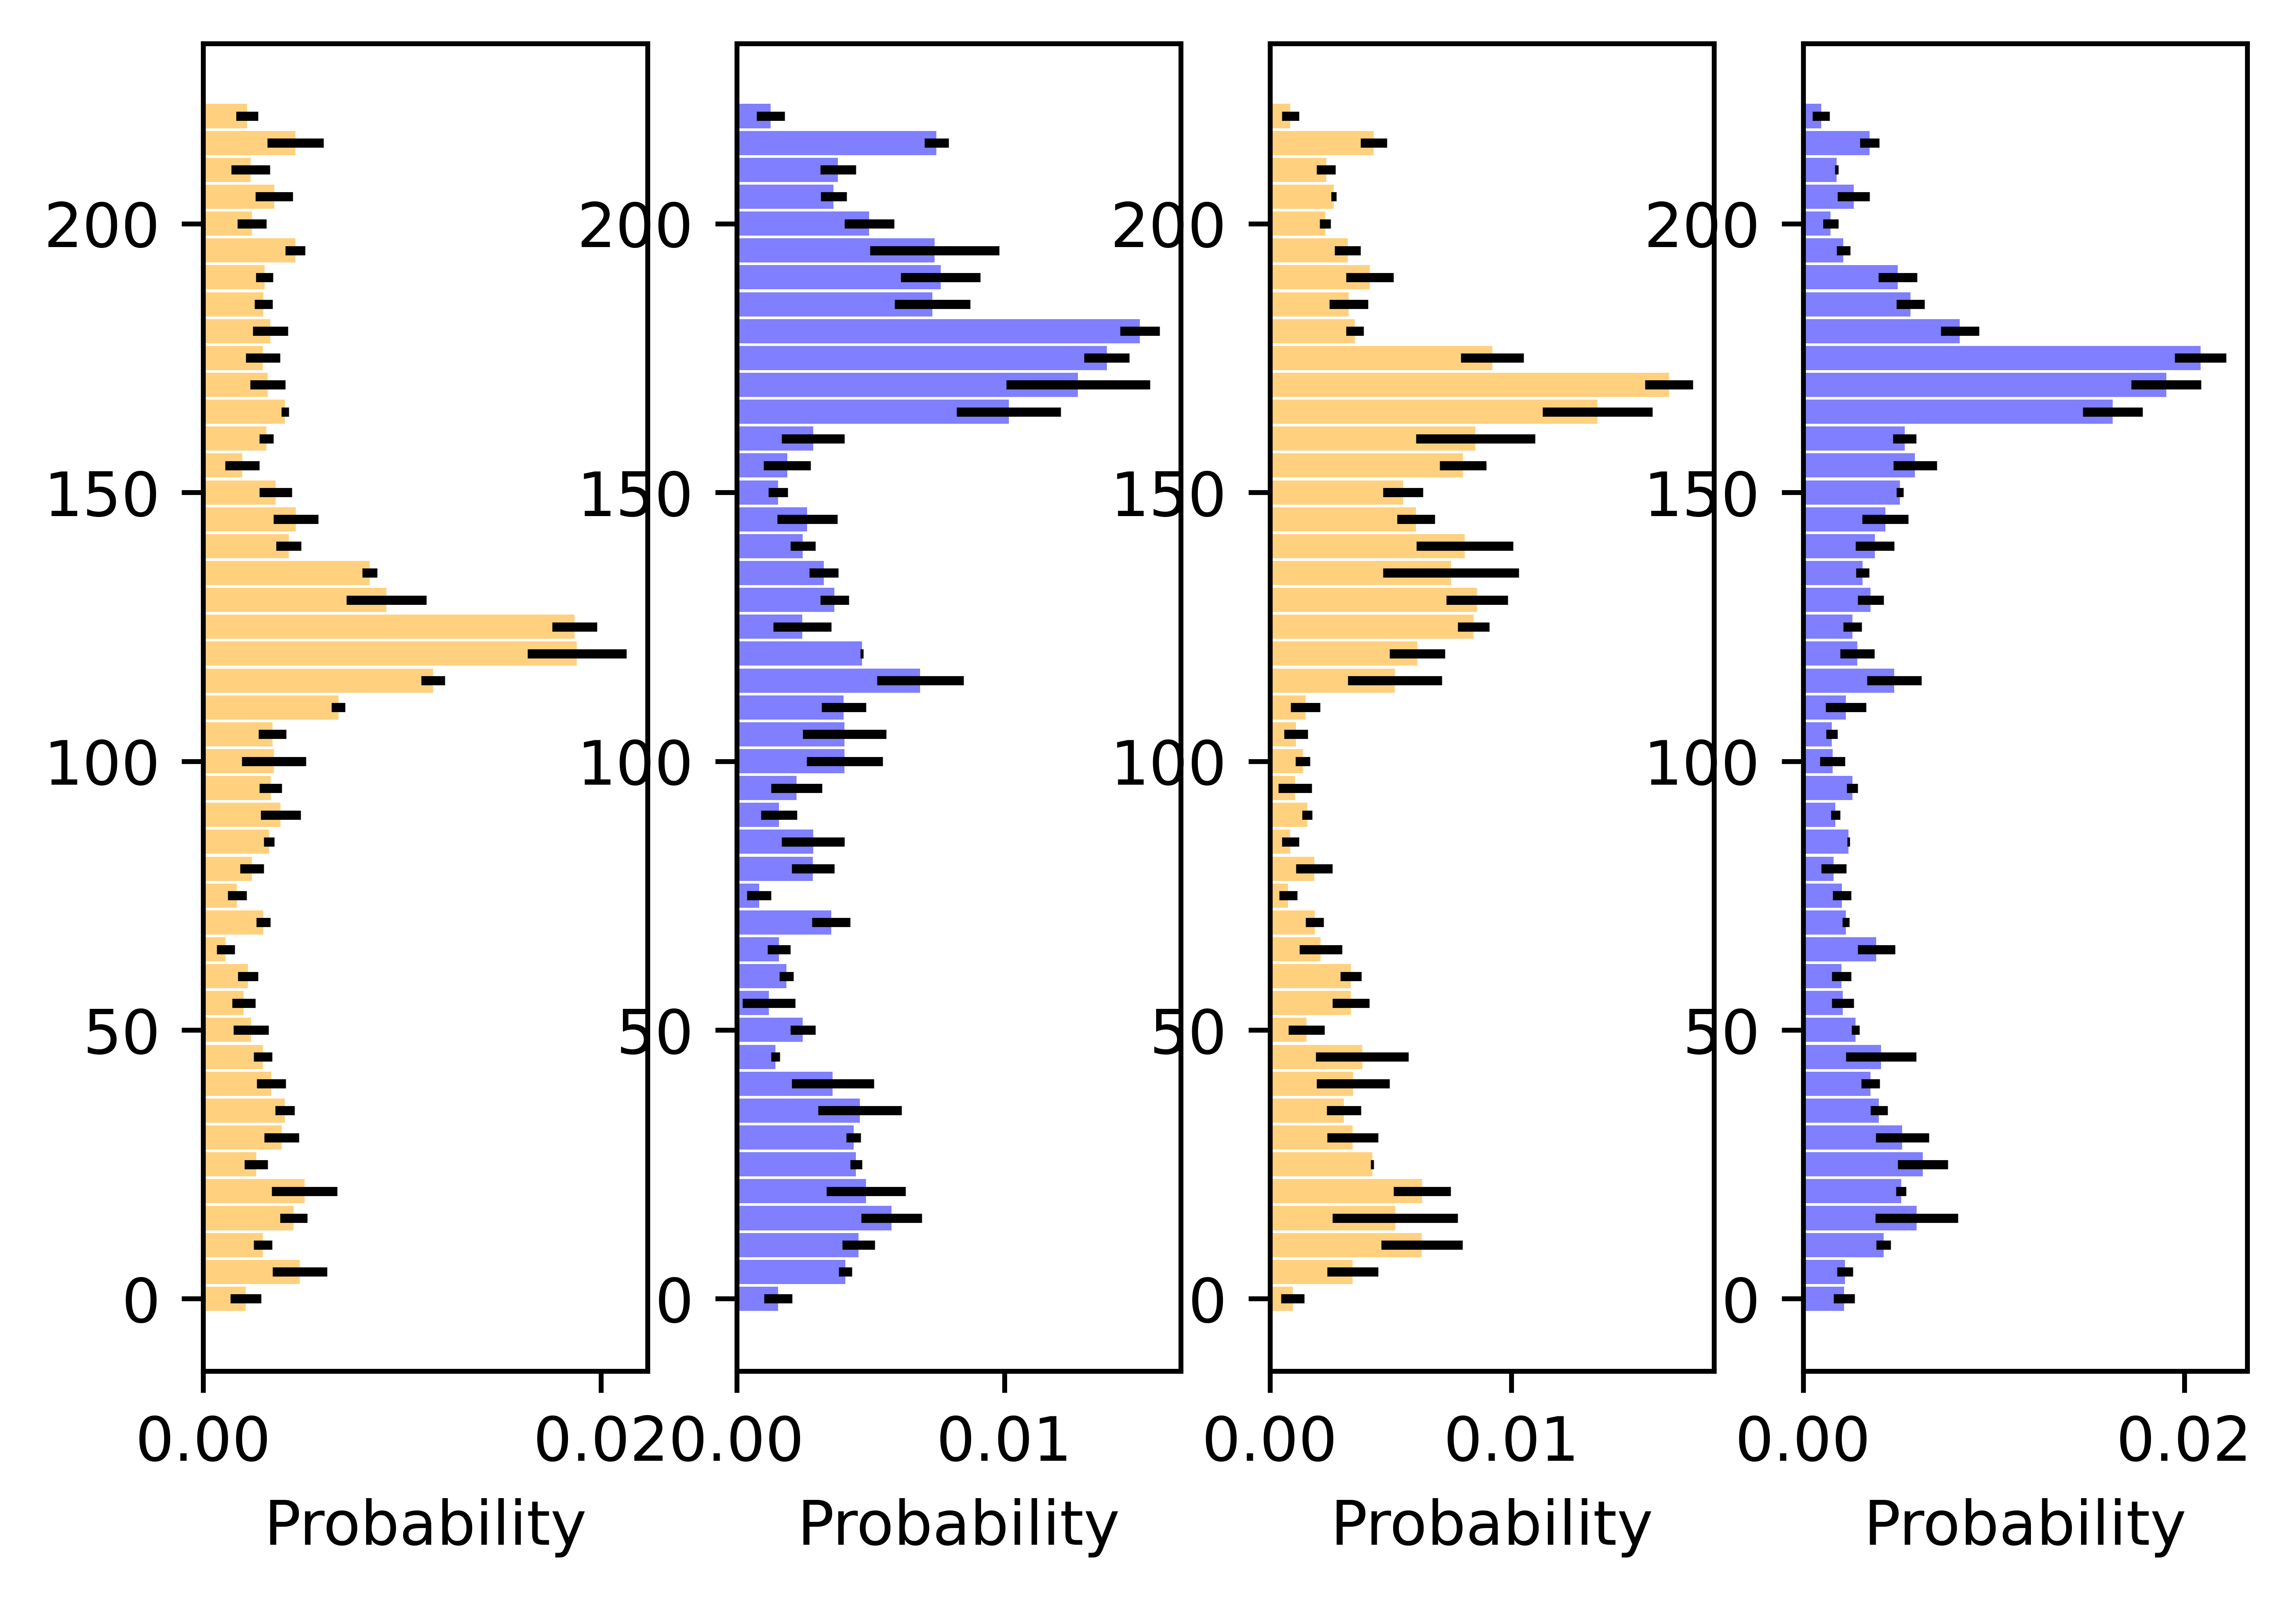

In [10]:
import numpy as np

# Prepare arrays to hold histogram data
rect1_hist_data_near = []
rect2_hist_data_near = []
rect1_hist_data_far = []
rect2_hist_data_far = []

bins = range(0, 230, 5)

for i in range(3):
    for rid in range(2):
        # filter data that are inside the rectangles
        rect1_data = com_arrays_normal_probe[i][rid][(com_arrays_normal_probe[i][rid][:,2] >= 130) & 
                                                      (com_arrays_normal_probe[i][rid][:,2] <= 180) &
                                                      (com_arrays_normal_probe[i][rid][:,1] >= 0) &
                                                      (com_arrays_normal_probe[i][rid][:,1] <= 230)]
        
        rect2_data = com_arrays_normal_probe[i][rid][(com_arrays_normal_probe[i][rid][:,2] >= 230) & 
                                                      (com_arrays_normal_probe[i][rid][:,2] <= 280) &
                                                      (com_arrays_normal_probe[i][rid][:,1] >= 0) &
                                                      (com_arrays_normal_probe[i][rid][:,1] <= 230)]

        # calculate histograms of y coordinates
        rect1_hist, _ = np.histogram(rect1_data[:,1], bins=bins, density=True)
        rect2_hist, _ = np.histogram(rect2_data[:,1], bins=bins, density=True)

        # store the histogram data
        if trial_type[rid] == 'NEAR':
            rect1_hist_data_near.append(rect1_hist)
            rect2_hist_data_near.append(rect2_hist)
        else:  # 'FAR'
            rect1_hist_data_far.append(rect1_hist)
            rect2_hist_data_far.append(rect2_hist)

# calculate mean and SEM
rect1_hist_near_mean = np.mean(rect1_hist_data_near, axis=0)
rect1_hist_near_sem = np.std(rect1_hist_data_near, axis=0) / np.sqrt(3)
rect2_hist_near_mean = np.mean(rect2_hist_data_near, axis=0)
rect2_hist_near_sem = np.std(rect2_hist_data_near, axis=0) / np.sqrt(3)

rect1_hist_far_mean = np.mean(rect1_hist_data_far, axis=0)
rect1_hist_far_sem = np.std(rect1_hist_data_far, axis=0) / np.sqrt(3)
rect2_hist_far_mean = np.mean(rect2_hist_data_far, axis=0)
rect2_hist_far_sem = np.std(rect2_hist_data_far, axis=0) / np.sqrt(3)

# create figure
fig, ax = plt.subplots(1, 4, figsize=(6, 4), dpi = 1000)

# plot mean and SEM for each rectangle and trial type
ax[0].barh(bins[:-1], rect1_hist_near_mean, xerr=rect1_hist_near_sem, height=4.5, alpha=0.5, color='orange', label='Rectangle 1, NEAR')
ax[1].barh(bins[:-1], rect2_hist_near_mean, xerr=rect2_hist_near_sem, height=4.5, alpha=0.5, color='blue', label='Rectangle 2, NEAR')
ax[2].barh(bins[:-1], rect1_hist_far_mean, xerr=rect1_hist_far_sem, height=4.5, alpha=0.5, color='orange', label='Rectangle 1, FAR')
ax[3].barh(bins[:-1], rect2_hist_far_mean, xerr=rect2_hist_far_sem, height=4.5, alpha=0.5, color='blue', label='Rectangle 2, FAR')

for i in range(4):
    ax[i].set_xlabel('Probability')
    #ax[i].set_ylabel('Y Position (cm)')
    #ax[i].legend()

#plt.savefig('stretched_trials_histogram_mean.pdf', format='pdf', dpi=500)
plt.show()


In [11]:
bin_centers = np.arange(5,230,5)

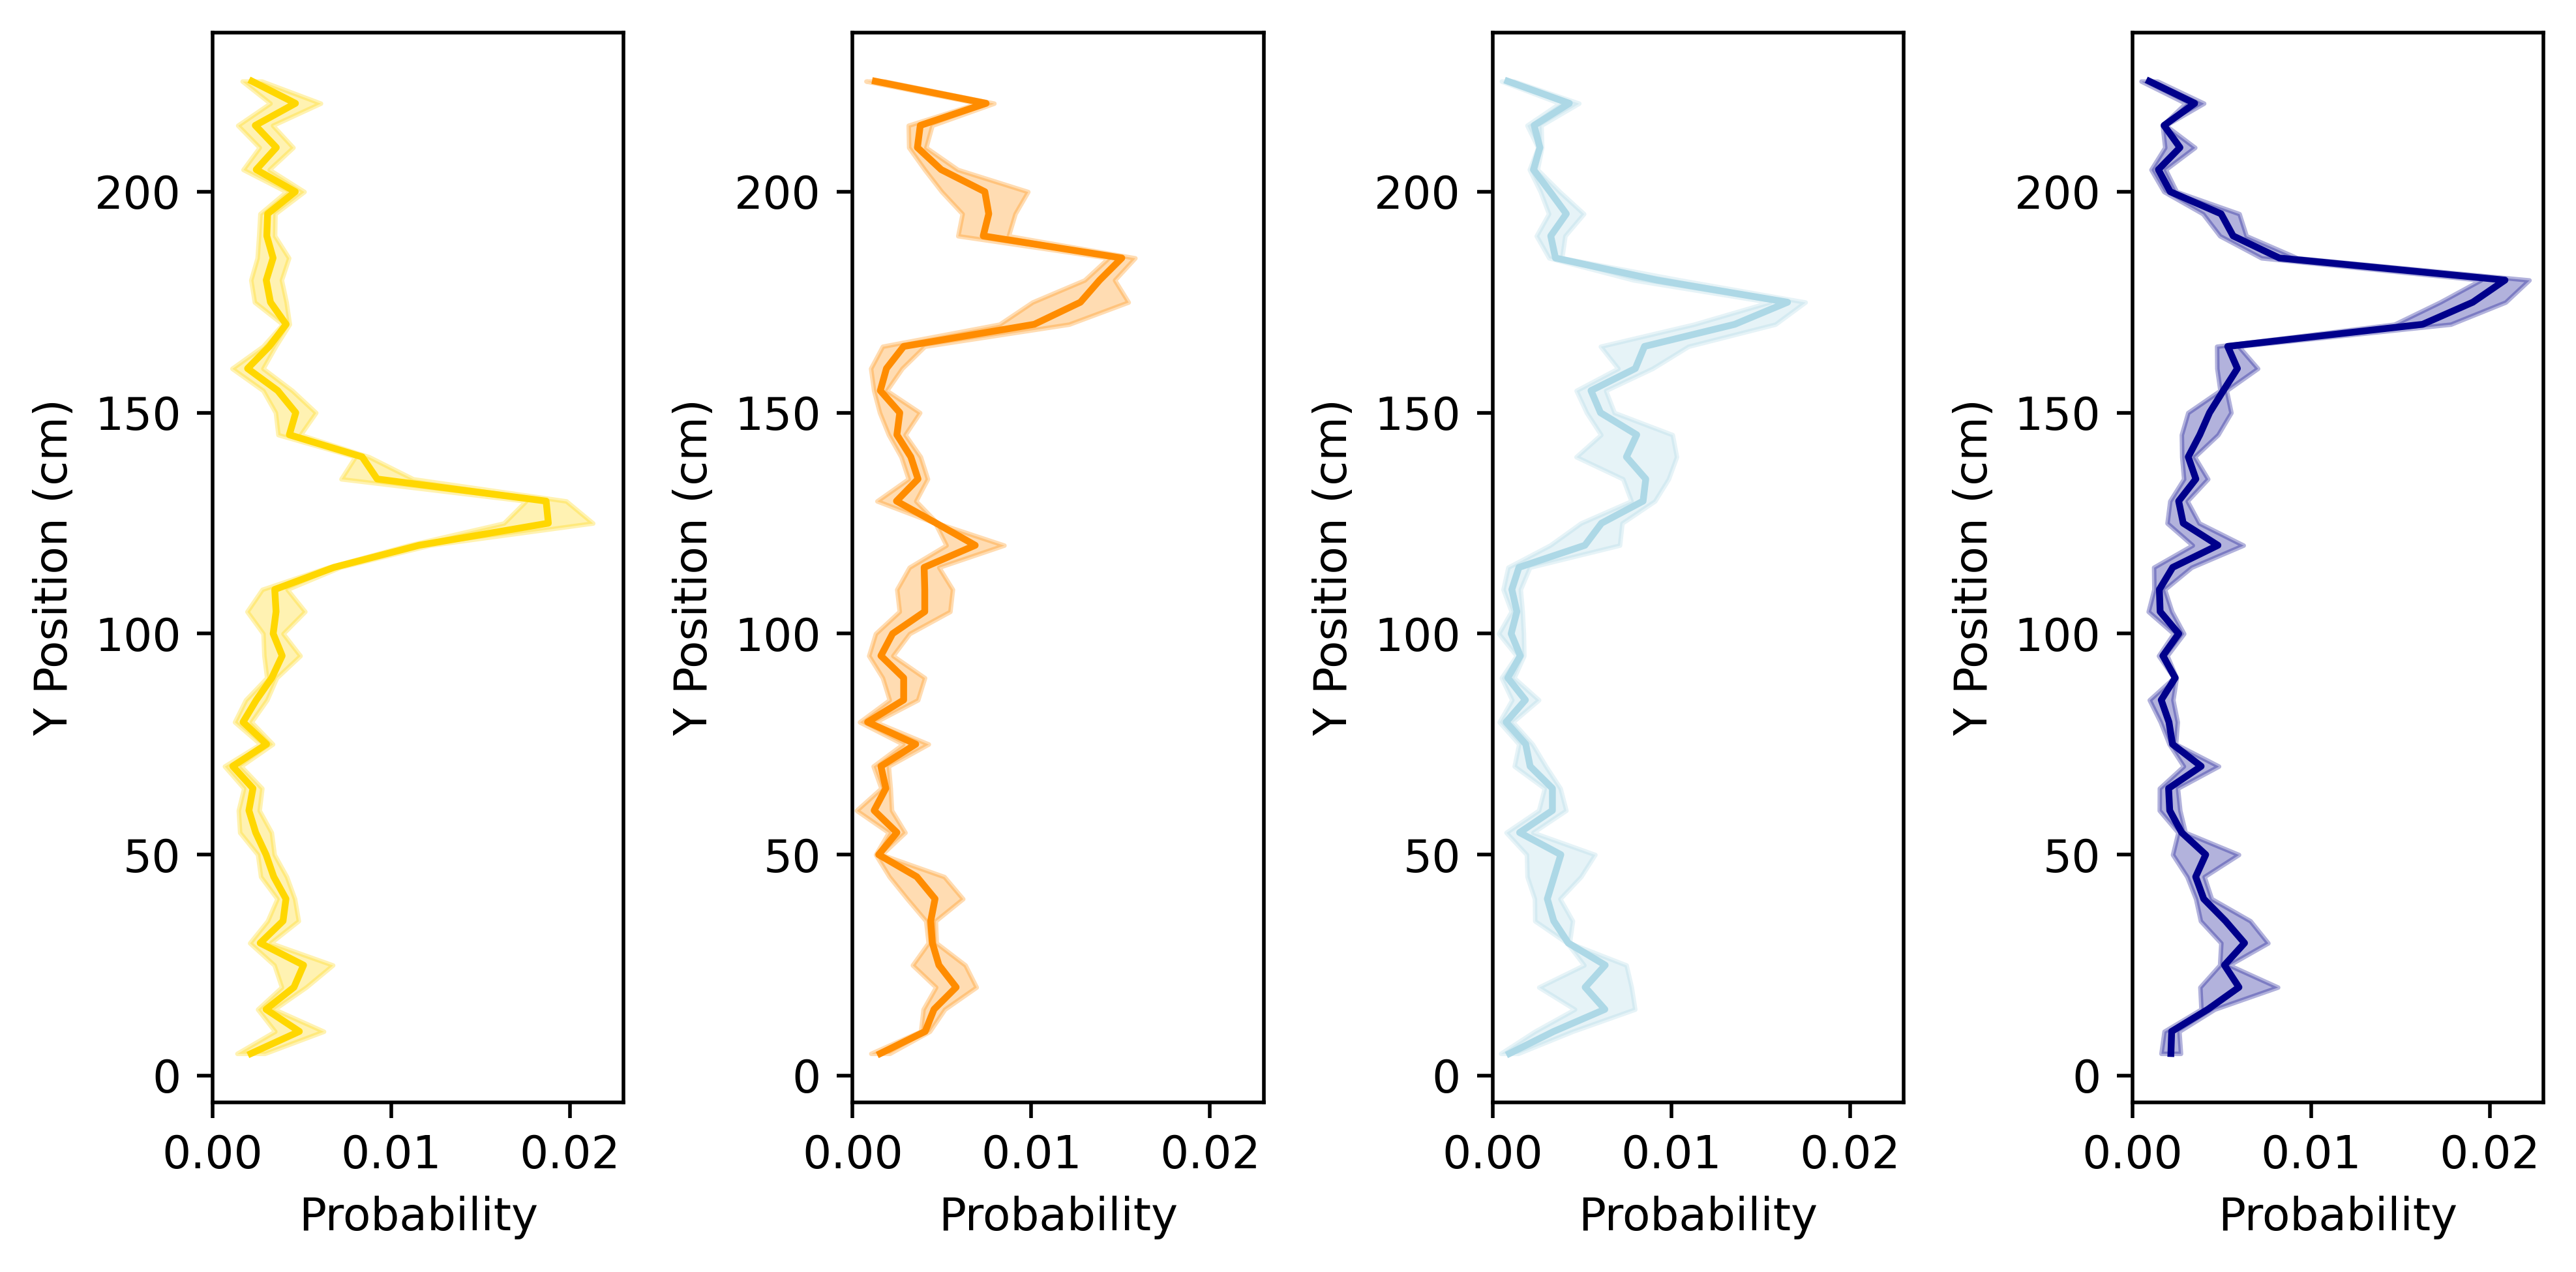

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(8, 4), dpi = 500)

# Use darker shades of yellow and orange
dark_yellow = '#FFD700' 
dark_orange = '#FF8C00'

# plot mean and SEM for each rectangle and trial type
ax[0].plot(rect1_hist_near_mean, bin_centers, color=dark_yellow, label='Rectangle 1, NEAR')
ax[0].fill_betweenx(bin_centers, rect1_hist_near_mean-rect1_hist_near_sem, rect1_hist_near_mean+rect1_hist_near_sem, color=dark_yellow, alpha=0.3)
ax[1].plot(rect2_hist_near_mean, bin_centers, color=dark_orange, label='Rectangle 2, NEAR')
ax[1].fill_betweenx(bin_centers, rect2_hist_near_mean-rect2_hist_near_sem, rect2_hist_near_mean+rect2_hist_near_sem, color=dark_orange, alpha=0.3)
ax[2].plot(rect1_hist_far_mean, bin_centers, color='lightblue', label='Rectangle 1, FAR')
ax[2].fill_betweenx(bin_centers, rect1_hist_far_mean-rect1_hist_far_sem, rect1_hist_far_mean+rect1_hist_far_sem, color='lightblue', alpha=0.3)
ax[3].plot(rect2_hist_far_mean, bin_centers, color='darkblue', label='Rectangle 2, FAR')
ax[3].fill_betweenx(bin_centers, rect2_hist_far_mean-rect2_hist_far_sem, rect2_hist_far_mean+rect2_hist_far_sem, color='darkblue', alpha=0.3)

for i in range(4):
    ax[i].set_xlim(0, 0.023)  # Set the limit of the x-axis
    ax[i].set_xlabel('Probability')
    ax[i].set_ylabel('Y Position (cm)')

plt.tight_layout()
plt.savefig('stretched_trials_histogram_mean.pdf', format='pdf', dpi=500)
plt.show()


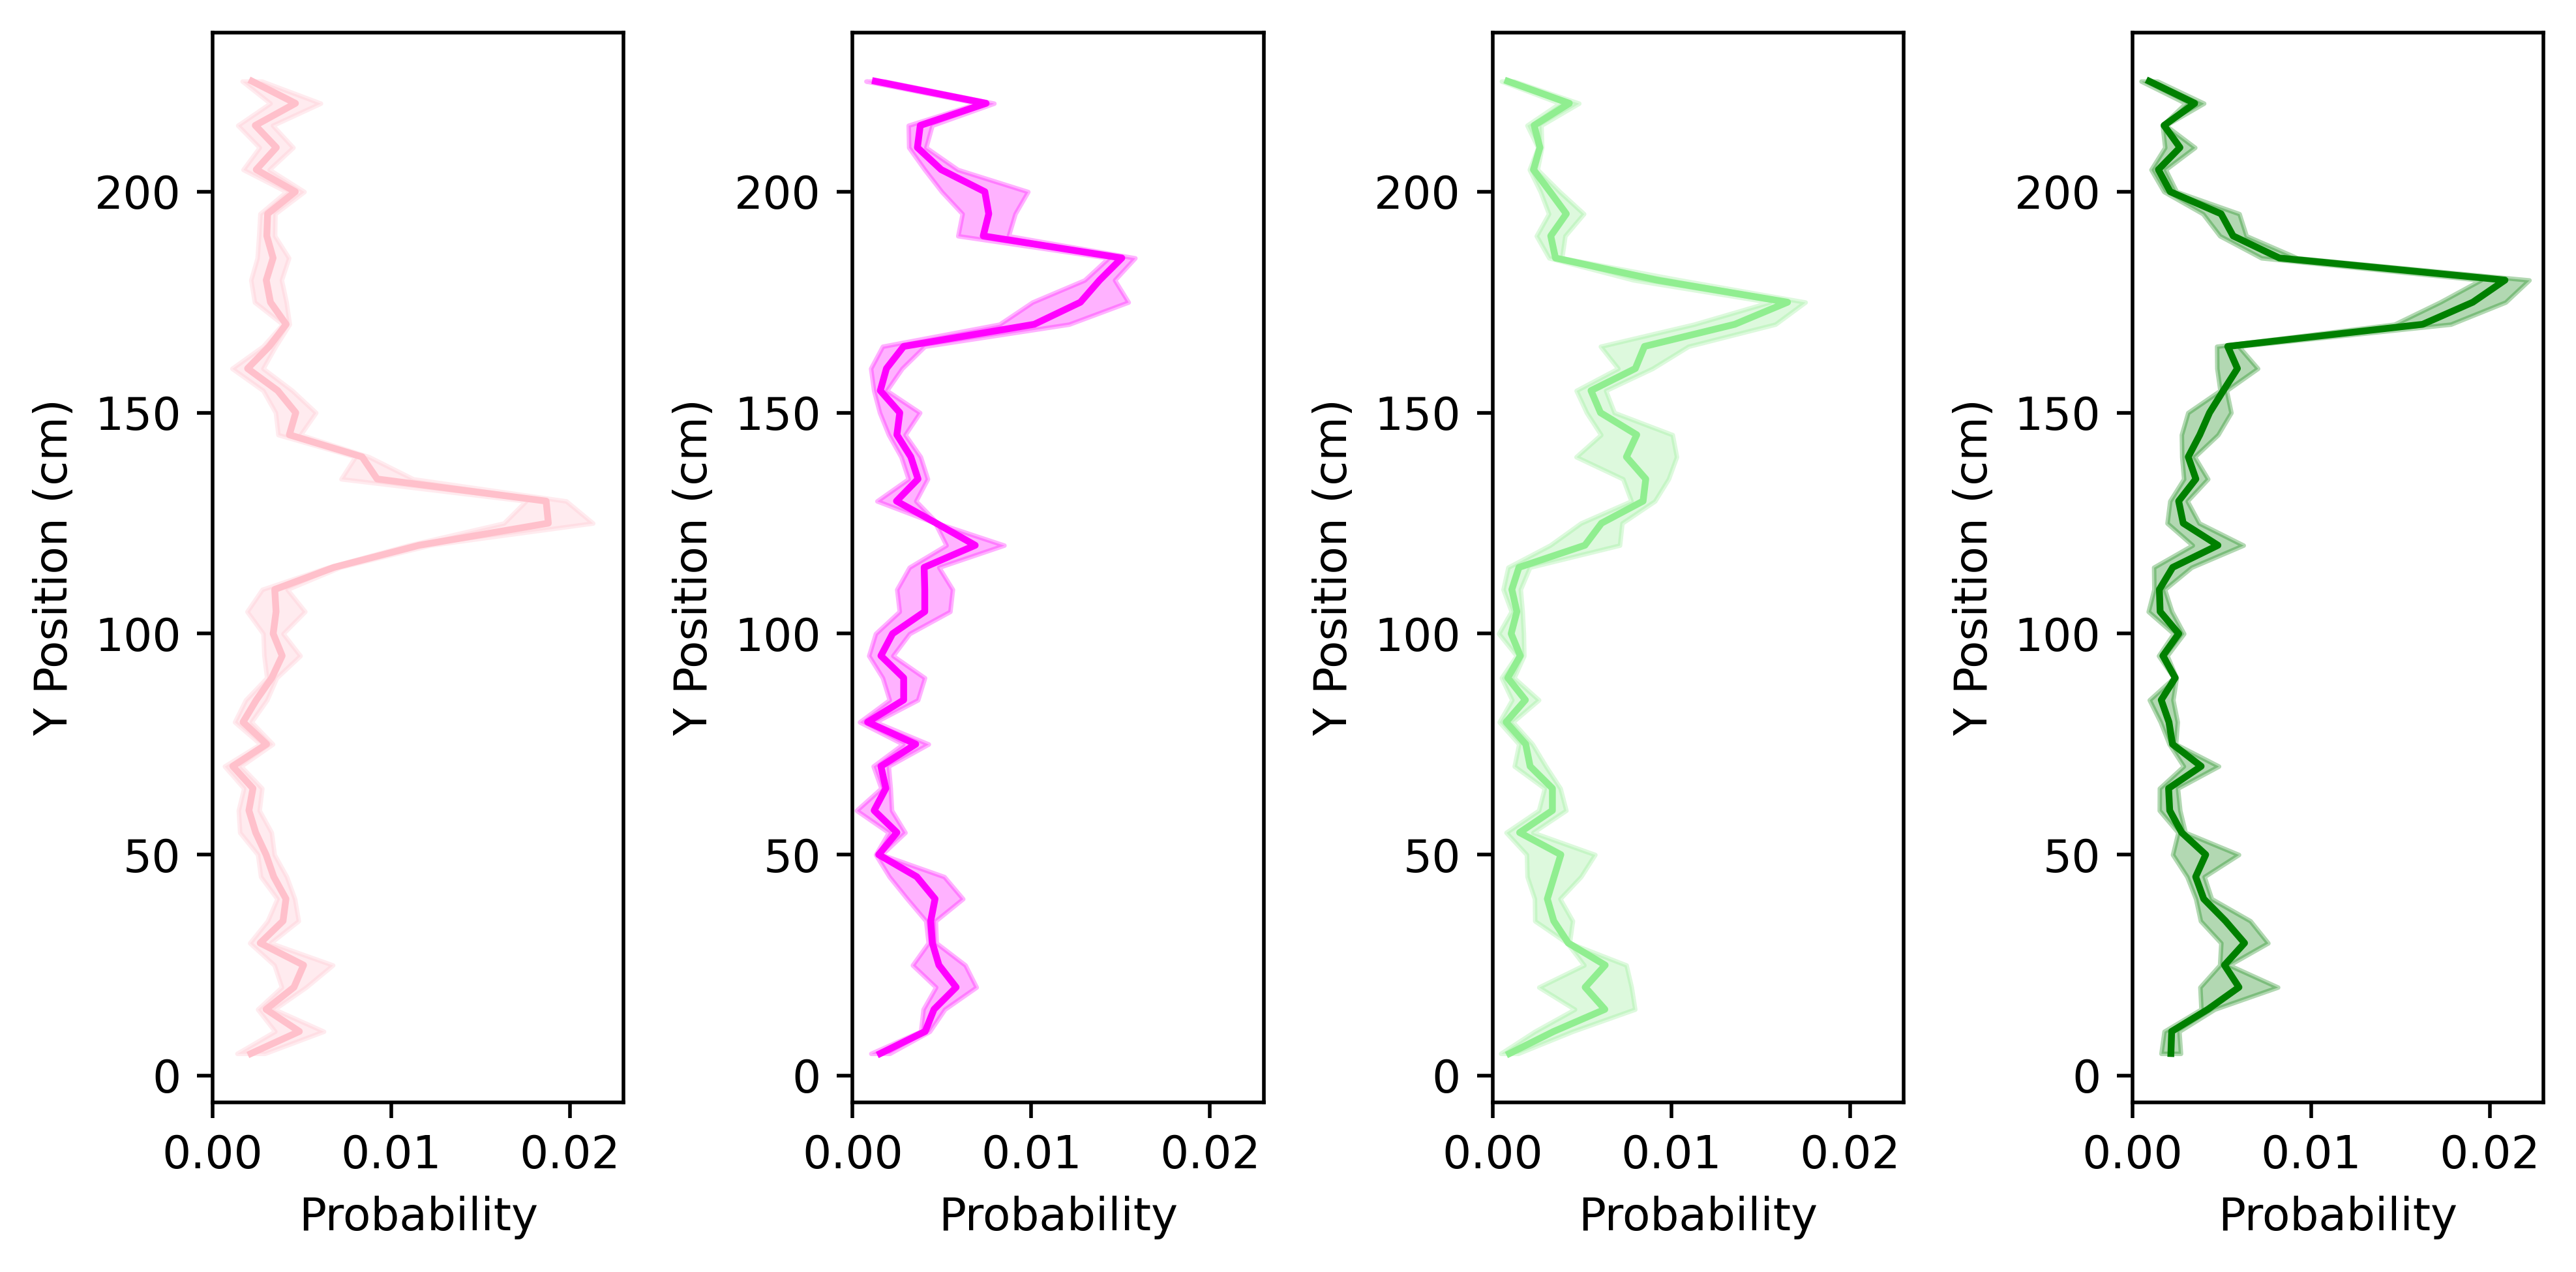

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(8, 4), dpi = 500)

# Use darker shades of green and pink-magenta
dark_green = '#008000' 
light_green = '#90EE90'
magenta = '#FF00FF'
pink = '#FFC0CB'

# plot mean and SEM for each rectangle and trial type
ax[0].plot(rect1_hist_near_mean, bin_centers, color=pink, label='Rectangle 1, NEAR')
ax[0].fill_betweenx(bin_centers, rect1_hist_near_mean-rect1_hist_near_sem, rect1_hist_near_mean+rect1_hist_near_sem, color=pink, alpha=0.3)
ax[1].plot(rect2_hist_near_mean, bin_centers, color=magenta, label='Rectangle 2, NEAR')
ax[1].fill_betweenx(bin_centers, rect2_hist_near_mean-rect2_hist_near_sem, rect2_hist_near_mean+rect2_hist_near_sem, color=magenta, alpha=0.3)
ax[2].plot(rect1_hist_far_mean, bin_centers, color=light_green, label='Rectangle 1, FAR')
ax[2].fill_betweenx(bin_centers, rect1_hist_far_mean-rect1_hist_far_sem, rect1_hist_far_mean+rect1_hist_far_sem, color=light_green, alpha=0.3)
ax[3].plot(rect2_hist_far_mean, bin_centers, color=dark_green, label='Rectangle 2, FAR')
ax[3].fill_betweenx(bin_centers, rect2_hist_far_mean-rect2_hist_far_sem, rect2_hist_far_mean+rect2_hist_far_sem, color=dark_green, alpha=0.3)

for i in range(4):
    ax[i].set_xlim(0, 0.023)  # Set the limit of the x-axis
    ax[i].set_xlabel('Probability')
    ax[i].set_ylabel('Y Position (cm)')

plt.tight_layout()
plt.savefig('stretched_trials_histogram_mean.pdf', format='pdf', dpi=500)
plt.show()
